In [ ]:
#summary data for 

In [3]:
import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt
data_filename = 'condition_x.csv'

In [5]:
#read in the data
data = pd.read_csv('D:/CASA0007/cw1/coursework_1_data_2019.csv')[['2008_ratio','2013_ratio','2018_ratio']]
#show the first few lines
data.head()

,2008_ratio,2013_ratio,2018_ratio
0,0.003434,0.003458,0.004197
1,0.001583,0.001726,0.002172
2,0.001588,0.001848,0.002044
3,0.002553,0.002434,0.002609
4,0.001966,0.001984,0.002153


In [6]:
# Store each sample separately:
data1 = data['2008_ratio']
data2 = data['2013_ratio']
data3 = data['2018_ratio']

# Store some useful values

min1 = data1.min()
min2 = data2.min()
min3 = data3.min()

max1 = data1.max()
max2 = data2.max()
max3 = data3.max()

mean1 = data1.mean()
mean2 = data2.mean()
mean3 = data3.mean()

std1 = data1.std()
std2 = data2.std()
std3 = data3.std()

n1 = len(data1)
n2 = len(data2)
n3 = len(data3)


# And print some summary information:

data.describe()

,2008_ratio,2013_ratio,2018_ratio
count,152.000000,152.000000,152.000000
mean,0.003097,0.003210,0.003447
std,0.001371,0.001391,0.001387
min,0.000740,0.000419,0.001014
25%,0.002148,0.002269,0.002535
50%,0.002915,0.002985,0.003182
75%,0.003650,0.003811,0.004067
max,0.008241,0.008496,0.008729


In [35]:
#plotting histogram
output_filename1 = 'histogram_2008.png'
output_filename2 = 'histogram_2013.png'
output_filename3 = 'histogram_2018.png'

In [36]:
figure_width, figure_height = 7,7

In [37]:
import matplotlib.pyplot as plt
import numpy as np

In [38]:
plt.figure(figsize=(figure_width,figure_height))

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

In [46]:
bin_info = list(np.arange(0.0003,0.009,0.0001))

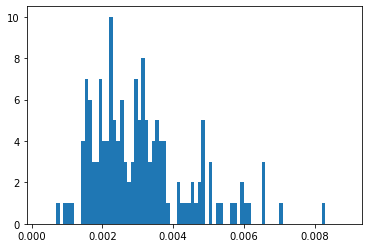

In [47]:
# The next lines create and save the plot:
plt.hist(data1,bins=bin_info)
plt.savefig(output_filename1)

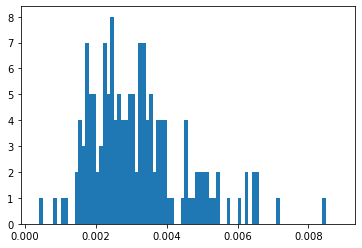

In [42]:
plt.hist(data2,bins=bin_info)
plt.savefig(output_filename2)

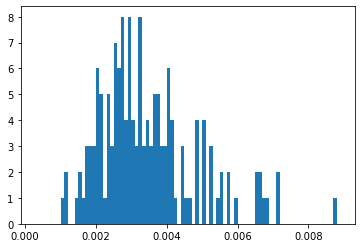

In [43]:
plt.hist(data3,bins=bin_info)
plt.savefig(output_filename3)

In [48]:
#hypothesis testing
# H0: mean ratio in 2008 =  Mean ratio in 2018
# H1: mean ratio in 2008 <  Mean ratio in 2018

In [50]:
# Set significance level:
alpha=0.05

In [51]:
std_ratio = std1/std3

print("std_ratio =", std_ratio)

if std_ratio > 0.5 and std_ratio < 2:
    print("Can assume equal population standard deviations.")
    equal_stds = True
else:
    print("Cannot assume equal population standard deviations.")
    equal_stds = False

std_ratio = 0.9880741147409441
Can assume equal population standard deviations.


In [52]:
test_stat, p_value = sps.ttest_ind(data1, data3, equal_var = equal_stds)
print("p-value =", p_value)

p-value = 0.027888314301507563


In [53]:
# Reach a conclusion:

if p_value < alpha:
    print("p-value < significance threshold.")
    print("Reject H0. Accept H1.")
   
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    

p-value < significance threshold.
Reject H0. Accept H1.


In [ ]:
#relationship between males and females 2008

In [153]:
filename = 'D:/CASA0007/cw1/coursework_1_data_2019.csv'

In [154]:
output_filename = 'data_2008.png'

In [155]:
figure_width, figure_height = 7,7

In [156]:
import matplotlib.pyplot as plt
import statsmodels.api as sms
import numpy as np

In [157]:
data = np.genfromtxt(data_filename,delimiter = ',')

In [158]:
x_values = data[1:,29]
y_values = data[1:,32]

In [159]:
print(x_values)
print(y_values)

[0.00222911 0.00125399 0.00134077 0.00180406 0.00181749 0.00191356
 0.00167571 0.00383969 0.00271623 0.00171468 0.00472423 0.00131511
 0.00324143 0.00259346 0.00186981 0.00293211 0.00116162 0.00166804
 0.00210126 0.00188281 0.00212408 0.00125    0.00157861 0.00239067
 0.00224059 0.00088449 0.00358214 0.00372783 0.00131796 0.00163444
 0.00137127 0.00223888 0.00311876 0.0013518  0.00192797 0.00221186
 0.0025112  0.00135546 0.00275741 0.00206545 0.00224239 0.00171582
 0.00153898 0.00118812 0.00169246 0.00136479 0.00262244 0.00259968
 0.00276689 0.00168647 0.00172134 0.00268044 0.00222946 0.00212573
 0.0013333  0.00244201 0.00163264 0.00179611 0.00234953 0.00184332
 0.00195532 0.00150207 0.00201243 0.00128259 0.00129663 0.00214649
 0.00269265 0.00197715 0.00271603 0.00163725 0.00208044 0.00239792
 0.001203   0.00203466 0.00247749 0.00175382 0.00271194 0.00277273
 0.00150359 0.0014479  0.0027393  0.00127757 0.00160507 0.00198629
 0.00193386 0.0011356  0.0021573  0.00230937 0.00267394 0.0032

In [160]:
# These lines perform the regression procedure:
X_values = sms.add_constant(x_values)
regression_model_a = sms.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     539.4
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           1.55e-51
Time:                        18:37:58   Log-Likelihood:                 859.43
No. Observations:                 152   AIC:                            -1715.
Df Residuals:                     150   BIC:                            -1709.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.484      0.1

In [161]:
# Now we store all the relevant values:
gradient  = regression_model_b.params[1]
intercept = regression_model_b.params[0]
Rsquared  = regression_model_b.rsquared
MSE       = regression_model_b.mse_resid
pvalue    = regression_model_b.f_pvalue

In [162]:
# And print them:
print("gradient  =", regression_model_b.params[1])
print("intercept =", regression_model_b.params[0])
print("Rsquared  =", regression_model_b.rsquared)
print("MSE       =", regression_model_b.mse_resid)
print("pvalue    =", regression_model_b.f_pvalue)

gradient  = 1.6552466156608212
intercept = 0.000256464389342009
Rsquared  = 0.7824060993516244
MSE       = 7.280346894837992e-07
pvalue    = 1.54584964088066e-51


In [163]:
# This line creates the endpoints of the best-fit line:
x_lobf = [min(x_values),max(x_values)]
y_lobf = [x_lobf[0]*gradient + intercept,x_lobf[1]*gradient + intercept]

In [164]:
# This line creates the figure. 
plt.figure(figsize=(figure_width,figure_height))

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

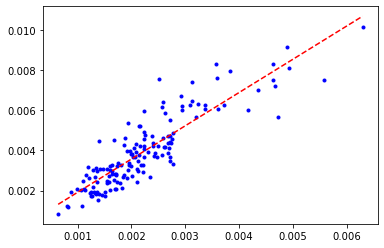

In [165]:
# The next lines create and save the plot:
plt.plot(x_values,y_values,'b.',x_lobf,y_lobf,'r--')
plt.savefig(output_filename)

In [ ]:
#relationship between male and female 2013

In [166]:
output_filename = 'data_2013.png'

In [167]:
figure_width, figure_height = 7,7

In [168]:
data = np.genfromtxt(data_filename,delimiter = ',')

In [169]:
x_values = data[1:,30]
y_values = data[1:,33]

In [170]:
print(x_values)
print(y_values)

[0.00231948 0.0012629  0.00158587 0.00153431 0.0017044  0.00188309
 0.00170936 0.00394263 0.00255671 0.00172513 0.00442425 0.00138948
 0.00324673 0.0028541  0.00181197 0.00279492 0.00107159 0.00163025
 0.00221258 0.00184041 0.0020366  0.00133778 0.0016216  0.00268641
 0.00228831 0.00063452 0.00380671 0.00402202 0.00141825 0.00167152
 0.00137056 0.00230124 0.00318132 0.00137512 0.00216165 0.00230402
 0.00261016 0.00141575 0.00311415 0.00231516 0.00228977 0.00188542
 0.00156273 0.00143543 0.00176725 0.00157222 0.00292559 0.00257672
 0.00273902 0.00166571 0.00200344 0.00271115 0.00256219 0.00226507
 0.00134034 0.00226121 0.00202441 0.00188487 0.00257349 0.
 0.00226295 0.00151668 0.00207912 0.00119569 0.0012677  0.00223161
 0.00292398 0.00205773 0.00275792 0.00173864 0.00206573 0.00250491
 0.00121471 0.00200865 0.00280888 0.00195539 0.00289485 0.00277969
 0.00188501 0.00153725 0.00277297 0.00135614 0.00193383 0.00216681
 0.00171123 0.00134625 0.00241229 0.00260004 0.00274381 0.0031638
 0.0

In [171]:
# These lines perform the regression procedure:
X_values = sms.add_constant(x_values)
regression_model_a = sms.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     427.2
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           9.63e-46
Time:                        18:38:59   Log-Likelihood:                 843.85
No. Observations:                 152   AIC:                            -1684.
Df Residuals:                     150   BIC:                            -1678.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      2.391      0.0

In [172]:
# Now we store all the relevant values:
gradient  = regression_model_b.params[1]
intercept = regression_model_b.params[0]
Rsquared  = regression_model_b.rsquared
MSE       = regression_model_b.mse_resid
pvalue    = regression_model_b.f_pvalue

In [173]:
# And print them:
print("gradient  =", regression_model_b.params[1])
print("intercept =", regression_model_b.params[0])
print("Rsquared  =", regression_model_b.rsquared)
print("MSE       =", regression_model_b.mse_resid)
print("pvalue    =", regression_model_b.f_pvalue)

gradient  = 1.582140182899098
intercept = 0.000457087959729091
Rsquared  = 0.7401340659151685
MSE       = 8.936370839660805e-07
pvalue    = 9.63206115896597e-46


In [174]:
# This line creates the endpoints of the best-fit line:
x_lobf = [min(x_values),max(x_values)]
y_lobf = [x_lobf[0]*gradient + intercept,x_lobf[1]*gradient + intercept]

In [175]:
# This line creates the figure. 
plt.figure(figsize=(figure_width,figure_height))

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

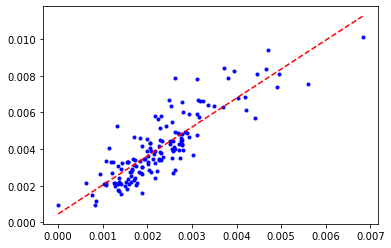

In [176]:
# The next lines create and save the plot:
plt.plot(x_values,y_values,'b.',x_lobf,y_lobf,'r--')
plt.savefig(output_filename)

In [ ]:
#relationship between male and female in 2018

In [177]:
output_filename = 'data_2018.png'

In [178]:
figure_width, figure_height = 7,7

In [179]:
data = np.genfromtxt(data_filename,delimiter = ',')

In [180]:
x_values = data[1:,31]
y_values = data[1:,34]

In [181]:
print(x_values)
print(y_values)

[0.00294936 0.00180504 0.00166857 0.00171636 0.00188841 0.00236952
 0.00185483 0.00425364 0.00265482 0.00207433 0.00464022 0.00178407
 0.00351786 0.00309493 0.00173124 0.00321317 0.00168128 0.00177475
 0.0026127  0.00207171 0.0020866  0.00141426 0.0018133  0.00293661
 0.00269292 0.00068244 0.00383242 0.00377988 0.00189139 0.00180677
 0.0014803  0.00233411 0.00315695 0.00147269 0.00221792 0.00227288
 0.00278039 0.00169306 0.00327057 0.00218724 0.00232892 0.00222716
 0.00164941 0.00183808 0.00194399 0.00170479 0.00318502 0.00282543
 0.00284365 0.0017435  0.00219823 0.00341747 0.00250134 0.00255189
 0.00163116 0.00243238 0.00201456 0.00240387 0.00291535 0.00070126
 0.00253706 0.00220792 0.00204967 0.00127665 0.0019379  0.00247015
 0.00320038 0.0023283  0.00305851 0.00191496 0.00218633 0.00250246
 0.00160277 0.00212642 0.00304922 0.00192325 0.00292088 0.002835
 0.0023404  0.00174512 0.00250418 0.00153342 0.00185462 0.00222617
 0.00208486 0.00122877 0.00229621 0.0026464  0.00300507 0.003333

In [182]:
# These lines perform the regression procedure:
X_values = sms.add_constant(x_values)
regression_model_a = sms.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     390.5
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           1.36e-43
Time:                        18:42:26   Log-Likelihood:                 839.59
No. Observations:                 152   AIC:                            -1675.
Df Residuals:                     150   BIC:                            -1669.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.043      0.0

In [186]:
# Now we store all the relevant values:
gradient  = regression_model_b.params[1]
intercept = regression_model_b.params[0]
Rsquared  = regression_model_b.rsquared
MSE       = regression_model_b.mse_resid
pvalue    = regression_model_b.f_pvalue

In [187]:
# And print them:
print("gradient  =", regression_model_b.params[1])
print("intercept =", regression_model_b.params[0])
print("Rsquared  =", regression_model_b.rsquared)
print("MSE       =", regression_model_b.mse_resid)
print("pvalue    =", regression_model_b.f_pvalue)

gradient  = 1.5832554936266525
intercept = 0.0004351380482922137
Rsquared  = 0.7224561478472127
MSE       = 9.452505664219551e-07
pvalue    = 1.3568906608237974e-43


In [183]:
# This line creates the endpoints of the best-fit line:
x_lobf = [min(x_values),max(x_values)]
y_lobf = [x_lobf[0]*gradient + intercept,x_lobf[1]*gradient + intercept]

In [184]:
# This line creates the figure. 
plt.figure(figsize=(figure_width,figure_height))

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

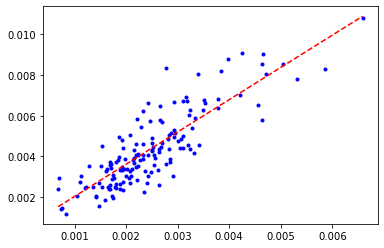

In [185]:
# The next lines create and save the plot:
plt.plot(x_values,y_values,'b.',x_lobf,y_lobf,'r--')
plt.savefig(output_filename)